# K近邻算法一览

<img src='image1.png'>

从上图看出，我们要判断某个点(称为星点)所属的分类，选择与其相近的11的数据点，在这11个点中有7个蓝色类别的点，4个黑色类别的点，所以星点被判为蓝色类别。

具体的判定规则如下：

<img src='image2.png'>

虽然K近邻算法计算量比较大，但是很明显的一个优点是它适用于决策边界非常不规律的数据集,比如下面这个三类别的模拟数据：

<img src='image3.png'>


knn算法中，我们需要找到与该点最相近的k个数据点，所谓相近需要用两点之间的距离来刻画。一般有欧氏距离和马氏距离两种。

而k的选择也会影响我们算法的正确率，因此对于knn算法中的k以及距离的选择总结如下：

<img src='image5.png'>


我们一般使用K-fold 交叉验证来挑选合适的k值：
<img src='image4.png'>

# knn算法的python实现

我们使用的训练数据源自 [Elements of Statistic Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/)的zip code数据集，在页面的最下方找到zip code 下载即可，包括训练数据和测试数据。

zip.train 文件的大小为7291×257，该文件中包含了7291个数字的图片，每行表示一个数字，每行的第一列表示该行对应的数字(即label),每个图片为16×16共256个维度,所以每行长度为257。



In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.cross_validation import KFold

#from sklearn import cross_validation

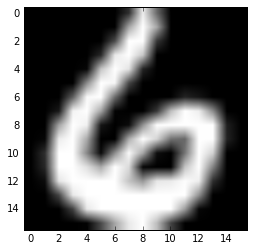

In [2]:
# 导入训练数据

zip_train=np.loadtxt('./zip.train')
train_samples=zip_train[:,1:]
train_labels=zip_train[:,0]


#导入测试数据
zip_test=np.loadtxt('./zip.test')
test_samples=zip_test[:,1:]
test_labels=zip_test[:,0]

#展示训练数据的第一行：
plt.imshow(train_samples[0].reshape((16,16)),cmap='gray')


In [3]:
train_accs=[]
test_accs=[]
for k in xrange(1,7):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(train_samples,train_labels)
    train_predict=clf.predict(train_samples)
    test_predict=clf.predict(test_samples)
    
    train_acc=np.mean(train_predict==train_labels)
    test_acc=np.mean(test_predict==test_labels)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    

In [4]:
kf = KFold(len(train_samples), n_folds=5,shuffle=True)

k_fold_acc=np.zeros((6,5))

for k in xrange(1,7):
    #predict_labels=np.zeros(len(train_samples))
    i=0
    for trainIndex,testIndex in kf:
        
        trainsamp=train_samples[trainIndex,:]
        trainLabels=train_labels[trainIndex]
        
        testSamp=train_samples[testIndex,:]
        
        testLabels=train_labels[testIndex]
        
        
        clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
        clf.fit(trainsamp,trainLabels)
        
        predict_values=clf.predict(testSamp)
        accrate=np.mean(testLabels==predict_values)
        k_fold_acc[k-1,i]=accrate
        i+=1
    

kfold_accu=k_fold_acc.mean(axis=1)      
kfold_accu_std=k_fold_acc.std(axis=1)

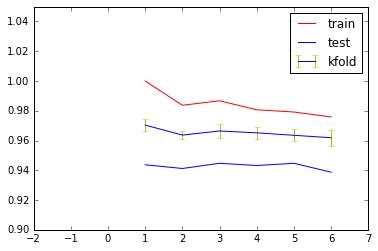

In [8]:
fig=plt.figure()
plt.xlim(-2,7)
plt.ylim(0.9,1.05)
plt.plot([1,2,3,4,5,6],train_accs,'r-')
plt.plot([1,2,3,4,5,6],test_accs,'b-')
plt.errorbar([1,2,3,4,5,6],kfold_accu,yerr=kfold_accu_std,ecolor='y')
plt.legend(('train','test','kfold'))
plt.show()